In [1]:
import numpy as np
import matplotlib.pylab as plt
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity

The data below are from https://www.engineeringtoolbox.com/air-diffusion-coefficient-gas-mixture-temperature-d_2010.html

In [39]:
D = AssignQuantity([0.219, 0.242, 0.399, 0.638, 0.873, 1.135],'cm^2/s')
D.ito('micrometer^2/microsecond'); print(D)
T = AssignQuantity([0, 20, 100, 200, 300, 400],'celsius')
T = T.to('kelvin'); print(T)

[21.900000000000002 24.200000000000003 39.900000000000006 63.80000000000001 87.30000000000001 113.50000000000001] micrometer ** 2 / microsecond
[273.15 293.15 373.15 473.15 573.15 673.15] kelvin


[ 1.86121271 -7.35421981]


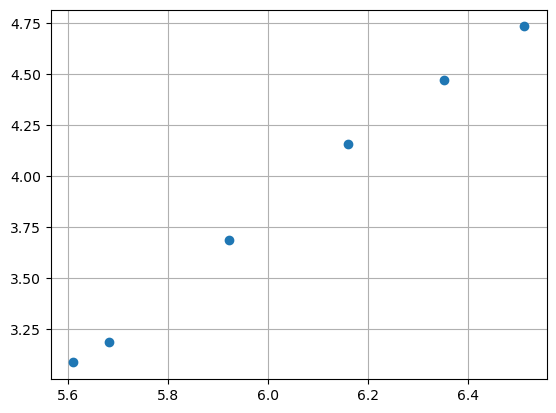

In [40]:
plt.figure()
logT = np.log(T.magnitude)
logD = np.log(D.magnitude)
plt.plot(logT,logD,'o')
plt.grid(True)
p = np.polyfit(logT,logD,1); print(p)

In [41]:
def getDofT(T):
    m = 1.86121271
    b = -7.35421981
    logD = m*np.log(T)+b
    D = np.exp(logD)
    return D

21.893732126411855
17.225916327971817


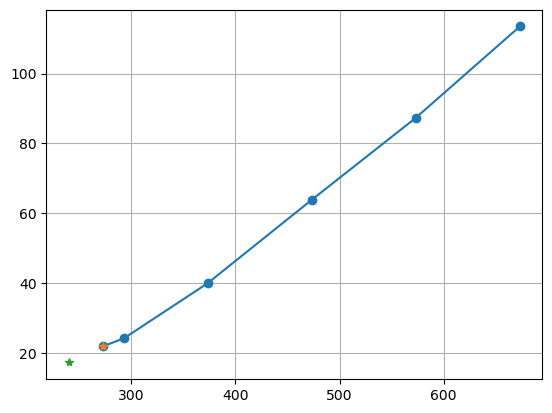

In [42]:
plt.figure()
plt.plot(T,D,'-o')
plt.grid(True)
Tnew = AssignQuantity(273,'kelvin')
Dnew = getDofT(Tnew.magnitude); print(Dnew)
plt.plot(Tnew,Dnew,'*')

Tnew = AssignQuantity(240,'kelvin')
Dnew = getDofT(Tnew.magnitude); print(Dnew)
plt.plot(Tnew,Dnew,'*')

In [ ]:
# # This is from engineering toolbox, with the power correction
# D_273 = AssignQuantity(0.219,'cm^2/s')
# D_273.ito('micrometer^2/microsecond'); print(D_273)
# T0 = AssignQuantity(273,'kelvin')
# P0 = AssignQuantity(1,'atm') 
# acoef = 2.072
# D = D_273*(Temp/T0)**acoef/(Pressure/P0); print('acoef method says D = ', D)